<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Session - 8<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project Solution<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

In [ ]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [5]:
my_data_dir = "data"

In [6]:
os.listdir(my_data_dir)

['test', 'validation', 'train']

In [7]:
val_path = os.path.join(my_data_dir, "validation")
train_path = os.path.join(my_data_dir, "train")
test_path = os.path.join(my_data_dir, "test")

In [ ]:
os.listdir(train_path)

['cat', 'dog']

In [ ]:
os.listdir(val_path)

['cat', 'dog']

In [ ]:
os.listdir(test_path)[:5]

['11035.jpg', '12361.jpg', '12214.jpg', '5395.jpg', '3435.jpg']

In [ ]:
# Alternative method
import pathlib

data_dir = pathlib.Path(train_path)  # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


**Let's check how many images there are.**

In [ ]:
len(os.listdir(os.path.join(train_path, "cat"))), len(
    os.listdir(os.path.join(train_path, "dog"))
)

(12500, 5026)

In [ ]:
len(os.listdir(os.path.join(val_path, "cat"))), len(
    os.listdir(os.path.join(val_path, "dog"))
)

(1219, 1071)

In [ ]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
    )

There are 3 directories and 0 images in 'data'.
There are 0 directories and 6897 images in 'data/test'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 0 directories and 1071 images in 'data/validation/dog'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 12500 images in 'data/train/cat'.
There are 0 directories and 5026 images in 'data/train/dog'.


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [ ]:
os.listdir(os.path.join(train_path, "cat"))[0]

'cat.12334.jpg'

In [ ]:
os.listdir(os.path.join(train_path, "dog"))[0]

'dog.2668.jpg'

In [8]:
path1 = os.path.join(train_path, "cat", os.listdir(os.path.join(train_path, "cat"))[0])
path2 = os.path.join(train_path, "dog", os.listdir(os.path.join(train_path, "dog"))[0])

In [ ]:
cat_img = imread(path1)
dog_img = imread(path2)

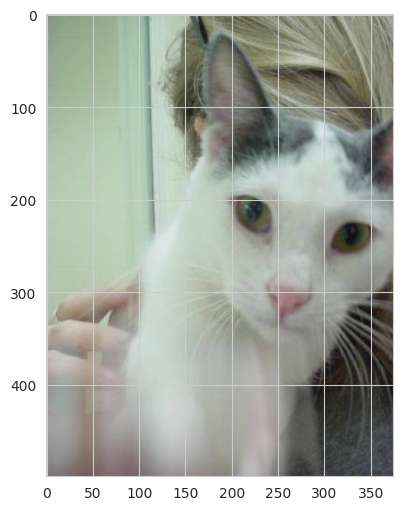

In [ ]:
plt.imshow(cat_img)
plt.show()

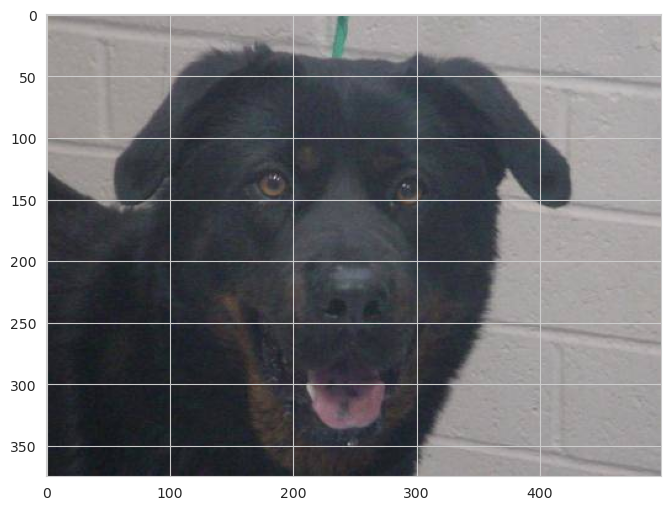

In [ ]:
plt.imshow(dog_img)
plt.show()

In [ ]:
# View an image
import random


def view_random_image(target_dir, target_class):
    """Display and return an image given the target_dir and target_class.
    Args:
        target_dir (str): The full or relative path of the directory of the target.
        target_class (str): The name of the target_class you want to display and return.
    Returns:
        img: (np.ndarray): Image as numpy array.
    """
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img

Image shape: (467, 499, 3)


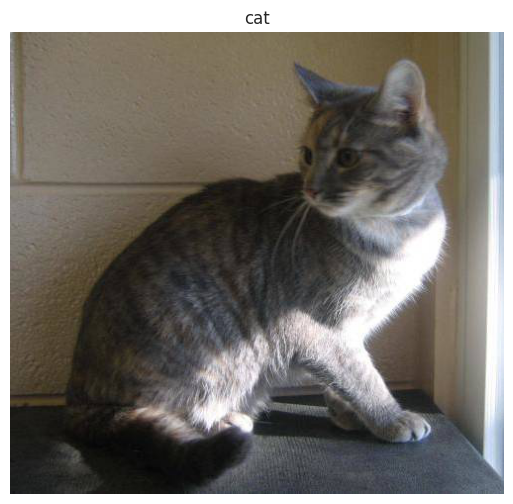

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="cat")

Image shape: (499, 375, 3)


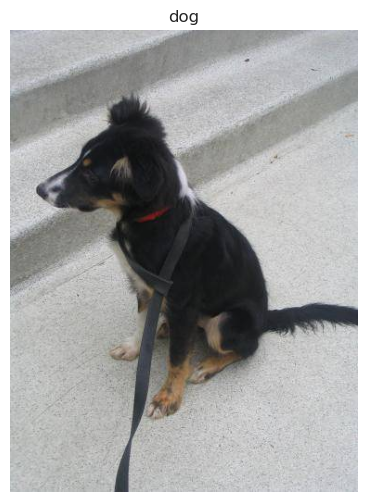

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir=val_path, target_class="dog")

Image shape: (500, 337, 3)


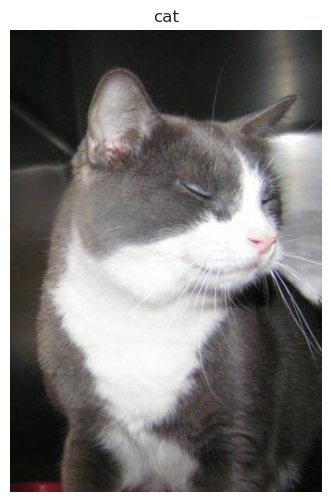

In [ ]:
# View a random image from the training dataset

img = view_random_image(target_dir=train_path, target_class=random.choice(class_names))
# get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [ ]:
cat_img.shape

(490, 500, 3)

In [ ]:
dog_img.shape

(375, 499, 3)

```python
x = []
y = []
for image in os.listdir(os.path.join(train_path, 'cat')):

    img = imread(os.path.join(train_path, 'cat', image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)
```

In [ ]:
x = [
    imread(os.path.join(train_path, "cat", image)).shape[0]
    for image in os.listdir(os.path.join(train_path, "cat"))
]
y = [
    imread(os.path.join(train_path, "cat", image)).shape[1]
    for image in os.listdir(os.path.join(train_path, "cat"))
]

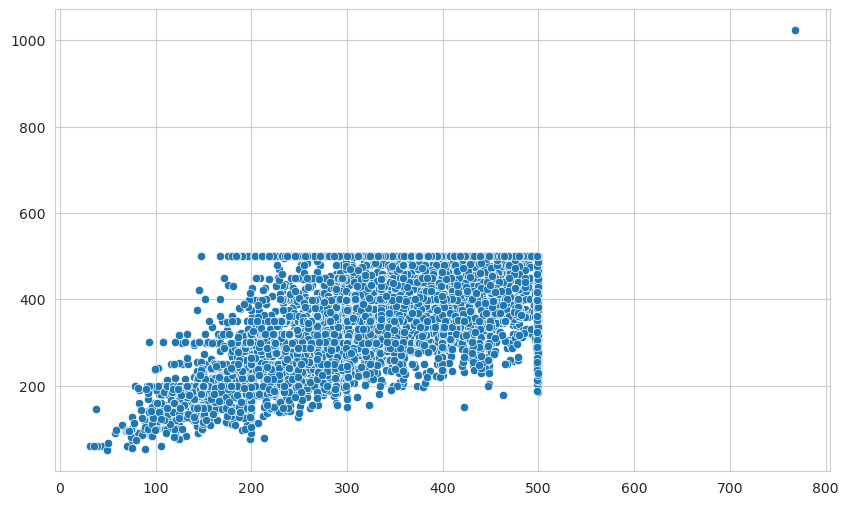

In [ ]:
sns.scatterplot(x=x, y=y)
plt.show()

In [ ]:
np.mean(x), np.median(x)

(356.46712, 374.0)

In [ ]:
np.mean(y), np.median(y)

(410.52264, 470.0)

In [9]:
image_shape = (128, 128, 3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [ ]:
cat_img.max()

255

In [ ]:
cat_img.min()

0

In [ ]:
dog_img.max(), dog_img.min()

(217, 13)

As we see above, images need to be scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# help(ImageDataGenerator)

In [11]:
image_gen = ImageDataGenerator(
    rotation_range=15,  # rotate the image up to 15 degrees
    width_shift_range=0.10,  # Shift the pic width by a max of 10%
    height_shift_range=0.10,  # Shift the pic height by a max of 10%
    rescale=1 / 255,  # Rescale the image by normalzing it.
    shear_range=0.1,  # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1,  # Zoom in/out by 10% max
    horizontal_flip=True,  # Allow horizontal flipping
    fill_mode="nearest",  # Fill in missing pixels with the nearest filled value
)

In [12]:
val_image_gen = ImageDataGenerator(rescale=1 / 255)

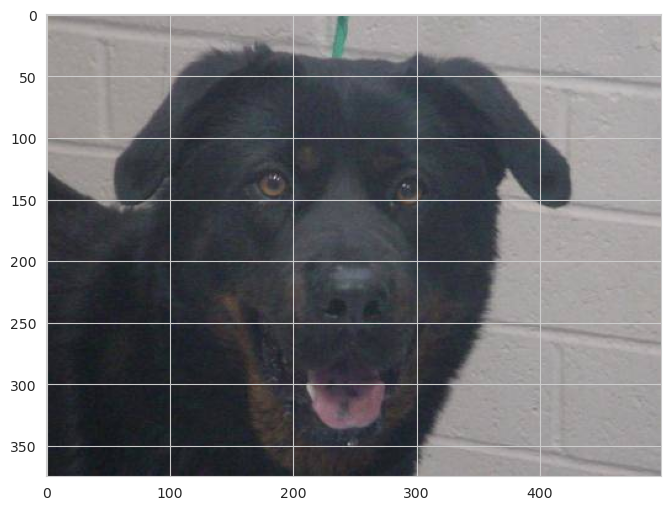

In [ ]:
plt.imshow(dog_img)
plt.show()

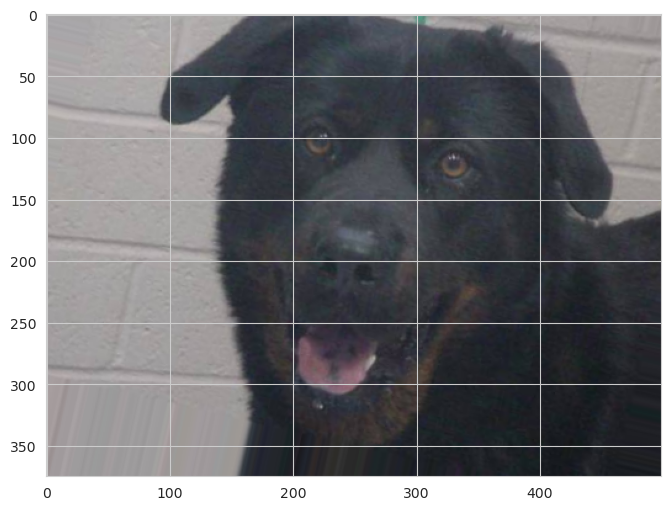

In [ ]:
plt.imshow(image_gen.random_transform(dog_img))
plt.show()

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [ ]:
# help(image_gen.flow_from_directory)
# Takes the path to a directory & generates batches of augmented data.

In [ ]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [ ]:
val_image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [13]:
batch_size = 32

In [ ]:
image_shape

(128, 128, 3)

In [14]:
train_image_gen = image_gen.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
)

Found 17526 images belonging to 2 classes.


In [15]:
val_image_gen = val_image_gen.flow_from_directory(
    directory=val_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
)

Found 2290 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
train_image_gen[0][0].shape

(32, 128, 128, 3)

In [ ]:
len(train_image_gen), len(val_image_gen)

(548, 72)

In [ ]:
len(train_image_gen) * batch_size, len(val_image_gen) * batch_size

(17536, 2304)

In [16]:
# Get a sample of the training data batch
images, labels = train_image_gen.next()  # get the 'next' batch of images/labels
images.shape, labels.shape

((32, 128, 128, 3), (32,))

In [17]:
# Get a sample of the testing data batch
images, labels = val_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    Dropout,
    Flatten,
    Dense,
    Conv2D,
    MaxPooling2D,
    BatchNormalization
)
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model1 = Sequential()

model1.add(
    Conv2D(filters=16, kernel_size=(3, 3), input_shape=image_shape, activation="relu")
)
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation("relu"))

model1.add(Dense(64))
model1.add(Activation("relu"))

model1.add(Dense(1))
model1.add(Activation("sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="min",patience=4, restore_best_weights=True)

In [ ]:
model1.fit(
    train_image_gen,
    epochs=10,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_image_gen,
    validation_steps=len(val_image_gen),
    callbacks=[early_stop],
)

Epoch 1/10
548/548 [==============================] - 137s 225ms/step - loss: 0.5818 - accuracy: 0.7236 - val_loss: 0.6628 - val_accuracy: 0.6092
Epoch 2/10
548/548 [==============================] - 123s 224ms/step - loss: 0.5054 - accuracy: 0.7601 - val_loss: 0.5656 - val_accuracy: 0.7162
Epoch 3/10
548/548 [==============================] - 120s 219ms/step - loss: 0.4552 - accuracy: 0.7923 - val_loss: 0.5752 - val_accuracy: 0.7131
Epoch 4/10
548/548 [==============================] - 121s 222ms/step - loss: 0.4130 - accuracy: 0.8153 - val_loss: 0.4335 - val_accuracy: 0.8009
Epoch 5/10
548/548 [==============================] - 121s 220ms/step - loss: 0.3822 - accuracy: 0.8292 - val_loss: 0.4051 - val_accuracy: 0.8240
Epoch 6/10
548/548 [==============================] - 121s 221ms/step - loss: 0.3561 - accuracy: 0.8416 - val_loss: 0.4330 - val_accuracy: 0.8092
Epoch 7/10
548/548 [==============================] - 121s 220ms/step - loss: 0.3300 - accuracy: 0.8566 - val_loss: 0.3597 -

In [ ]:
summary = pd.DataFrame(model1.history.history)

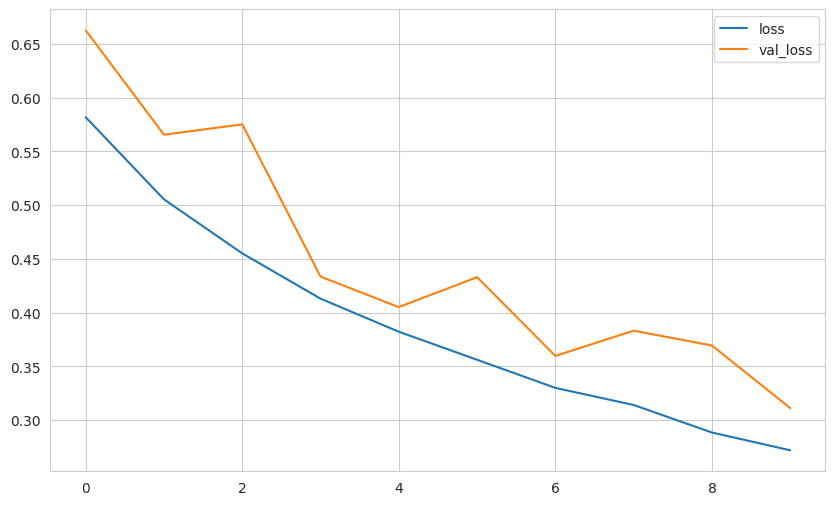

In [ ]:
summary[["loss", "val_loss"]].plot()
plt.show()

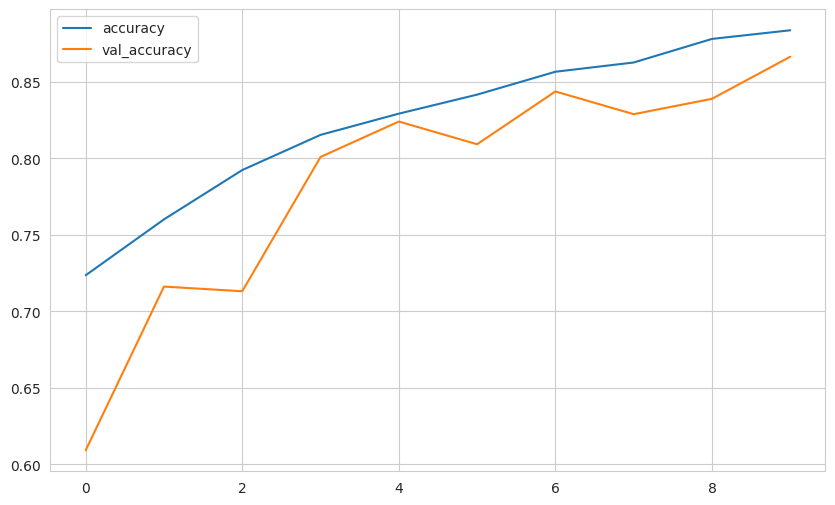

In [ ]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
score = model1.evaluate(val_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

72/72 [==============================] - 6s 86ms/step - loss: 0.3111 - accuracy: 0.8664
Test loss: 0.31111010909080505
Test accuracy: 0.8663755655288696


In [ ]:
pred_prob = model1.predict(val_image_gen)
pred_prob

72/72 [==============================] - 8s 104ms/step


array([[0.00012001],
       [0.66502124],
       [0.3836052 ],
       ...,
       [0.9759878 ],
       [0.999905  ],
       [0.9980903 ]], dtype=float32)

In [ ]:
y_pred = pred_prob > 0.5
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [33]:
y_test = val_image_gen.classes

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1219
           1       0.86      0.86      0.86      1071

    accuracy                           0.87      2290
   macro avg       0.87      0.87      0.87      2290
weighted avg       0.87      0.87      0.87      2290



In [ ]:
confusion_matrix(y_test, y_pred)

array([[1064,  155],
       [ 151,  920]])

# Modelling-2

In [19]:
model2 = Sequential()

model2.add(
    Conv2D(filters=16, kernel_size=(3, 3), input_shape=image_shape, activation="relu")
)
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128))
model2.add(Activation("relu"))

model2.add(Dense(128))
model2.add(Activation("relu"))

model2.add(Dense(1))
model2.add(Activation("sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 32)       128       
 hNormalization)                                                 
                                                        

In [22]:
early_stop = EarlyStopping(monitor="val_loss",mode="min", patience=4, restore_best_weights=True)

In [23]:
model2.fit(
    train_image_gen,
    epochs=15,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_image_gen,
    validation_steps=len(val_image_gen),
    callbacks=[early_stop],
)

Epoch 1/15
548/548 [==============================] - 157s 257ms/step - loss: 0.5212 - accuracy: 0.7554 - val_loss: 0.7193 - val_accuracy: 0.6463
Epoch 2/15
548/548 [==============================] - 139s 254ms/step - loss: 0.4337 - accuracy: 0.8047 - val_loss: 0.5295 - val_accuracy: 0.7389
Epoch 3/15
548/548 [==============================] - 139s 253ms/step - loss: 0.3738 - accuracy: 0.8354 - val_loss: 0.4138 - val_accuracy: 0.8157
Epoch 4/15
548/548 [==============================] - 142s 258ms/step - loss: 0.3236 - accuracy: 0.8587 - val_loss: 0.4066 - val_accuracy: 0.8231
Epoch 5/15
548/548 [==============================] - 141s 257ms/step - loss: 0.2862 - accuracy: 0.8761 - val_loss: 0.4446 - val_accuracy: 0.7965
Epoch 6/15
548/548 [==============================] - 141s 258ms/step - loss: 0.2531 - accuracy: 0.8922 - val_loss: 0.3677 - val_accuracy: 0.8476
Epoch 7/15
548/548 [==============================] - 138s 252ms/step - loss: 0.2408 - accuracy: 0.9012 - val_loss: 0.3307 -

In [24]:
summary = pd.DataFrame(model2.history.history)

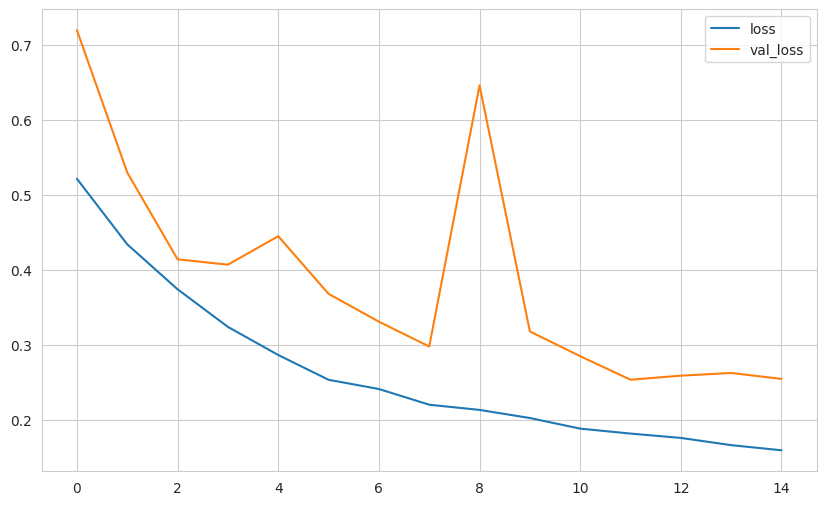

In [25]:
summary[["loss", "val_loss"]].plot()
plt.show()

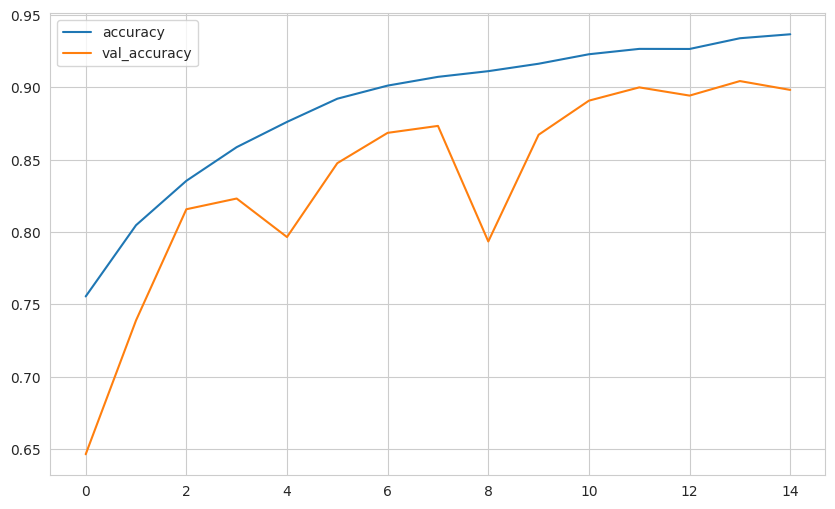

In [26]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

In [27]:
score = model2.evaluate(val_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

72/72 [==============================] - 9s 126ms/step - loss: 0.2543 - accuracy: 0.8983
Test loss: 0.2542756199836731
Test accuracy: 0.8982532620429993


In [28]:
pred_prob = model2.predict(val_image_gen)
pred_prob

72/72 [==============================] - 7s 96ms/step


array([[0.00000368],
       [0.4291533 ],
       [0.16701472],
       ...,
       [0.9985701 ],
       [0.9999958 ],
       [0.9861562 ]], dtype=float32)

In [29]:
y_pred = pred_prob > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1219
           1       0.87      0.92      0.89      1071

    accuracy                           0.90      2290
   macro avg       0.90      0.90      0.90      2290
weighted avg       0.90      0.90      0.90      2290



In [35]:
confusion_matrix(y_test, y_pred)

array([[1068,  151],
       [  82,  989]])

# Modelling-3

In [36]:
model3 = Sequential()

model3.add(
    Conv2D(
        filters=16,
        kernel_size=(3, 3),
        padding="same",
        input_shape=image_shape,
        activation="relu",
    )
)
model3.add(BatchNormalization())
model3.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128))
model3.add(Activation("relu"))

model3.add(Dense(128))
model3.add(Activation("relu"))

model3.add(Dense(1))
model3.add(Activation("sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                      

In [38]:
early_stop = EarlyStopping(monitor="val_loss",mode="min", patience=4, restore_best_weights=True)

In [39]:
model3.fit(
    train_image_gen,
    epochs=20,
    steps_per_epoch=len(train_image_gen),
    validation_data=val_image_gen,
    validation_steps=len(val_image_gen),
    callbacks=[early_stop],
)

Epoch 1/20
548/548 [==============================] - 159s 272ms/step - loss: 0.6096 - accuracy: 0.7165 - val_loss: 1.0131 - val_accuracy: 0.6380
Epoch 2/20
548/548 [==============================] - 144s 264ms/step - loss: 0.4889 - accuracy: 0.7697 - val_loss: 0.5652 - val_accuracy: 0.7022
Epoch 3/20
548/548 [==============================] - 144s 263ms/step - loss: 0.4192 - accuracy: 0.8080 - val_loss: 0.7371 - val_accuracy: 0.7039
Epoch 4/20
548/548 [==============================] - 143s 261ms/step - loss: 0.3794 - accuracy: 0.8314 - val_loss: 0.4777 - val_accuracy: 0.7882
Epoch 5/20
548/548 [==============================] - 144s 262ms/step - loss: 0.3374 - accuracy: 0.8504 - val_loss: 0.4951 - val_accuracy: 0.7659
Epoch 6/20
548/548 [==============================] - 143s 262ms/step - loss: 0.2921 - accuracy: 0.8752 - val_loss: 0.4278 - val_accuracy: 0.8122
Epoch 7/20
548/548 [==============================] - 142s 260ms/step - loss: 0.2451 - accuracy: 0.8987 - val_loss: 0.3196 -

In [40]:
# model3.save('cat_dog_detector.h5')

In [41]:
summary = pd.DataFrame(model3.history.history)

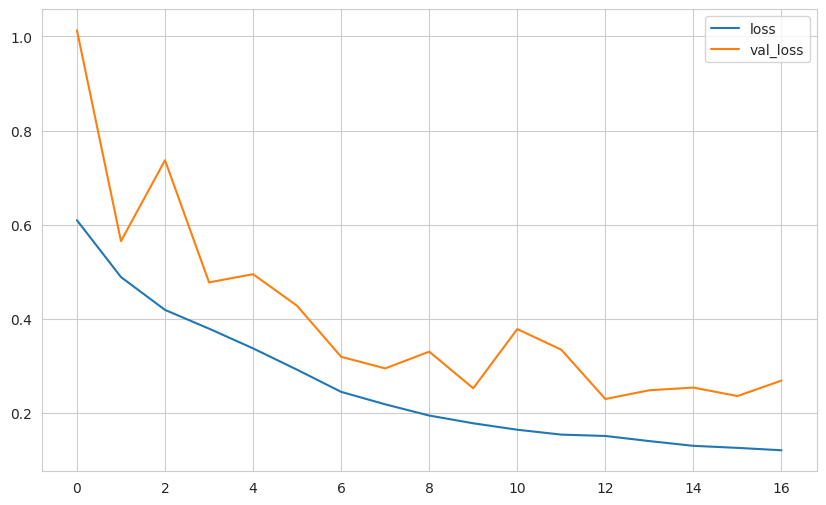

In [42]:
summary[["loss", "val_loss"]].plot()
plt.show()

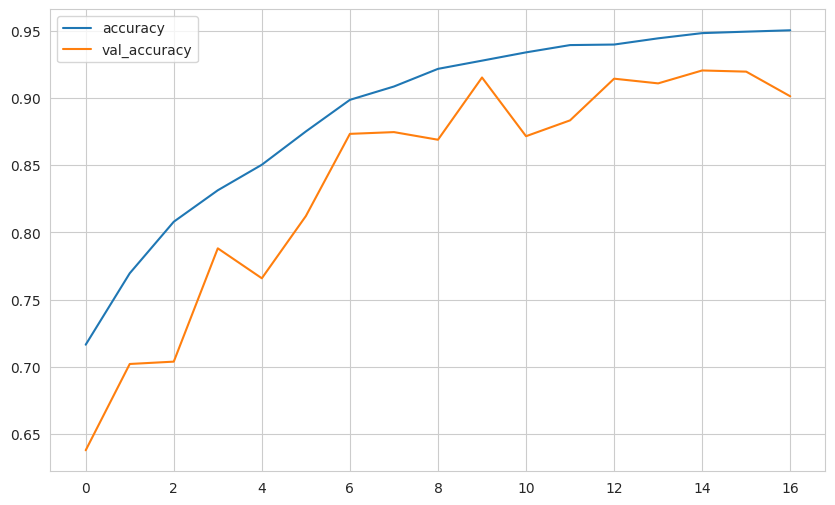

In [43]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Validation Data

In [44]:
score = model3.evaluate(val_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

72/72 [==============================] - 9s 121ms/step - loss: 0.2299 - accuracy: 0.9144
Test loss: 0.22992804646492004
Test accuracy: 0.9144104719161987


In [45]:
pred_prob = model3.predict(val_image_gen)
pred_prob

72/72 [==============================] - 7s 96ms/step


array([[0.0000346 ],
       [0.4724446 ],
       [0.03779918],
       ...,
       [0.9841994 ],
       [0.9999759 ],
       [0.99931383]], dtype=float32)

In [46]:
y_pred = pred_prob > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [47]:
y_test = val_image_gen.classes

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1219
           1       0.90      0.91      0.91      1071

    accuracy                           0.91      2290
   macro avg       0.91      0.91      0.91      2290
weighted avg       0.91      0.91      0.91      2290



In [49]:
confusion_matrix(y_test, y_pred)

array([[1115,  104],
       [  92,  979]])

In [50]:
model3.save("cat_dog_detector.h5")

# Prediction-1

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model("cat_dog_detector.h5")

In [ ]:
img_path = "./data/test/10071.jpg"

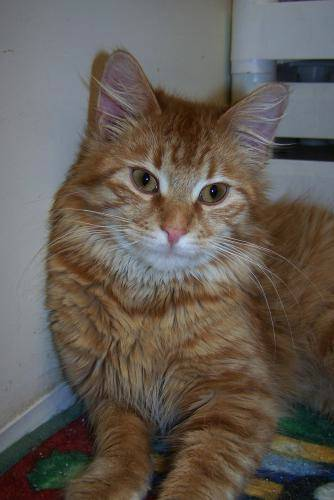

In [ ]:
img = image.load_img(img_path)
img

In [ ]:
img = np.array(img)

In [ ]:
img.shape

(500, 334, 3)

In [ ]:
resized_img = image.smart_resize(img, (128, 128))  # img has to be numpy array
resized_img.shape

# resized_img = img.resize((128, 128)) # img has to be image format (like jpg, png etc)
# resized_img

(128, 128, 3)

In [ ]:
resized_img.max()

227.16144

In [ ]:
resized_img = resized_img / 255

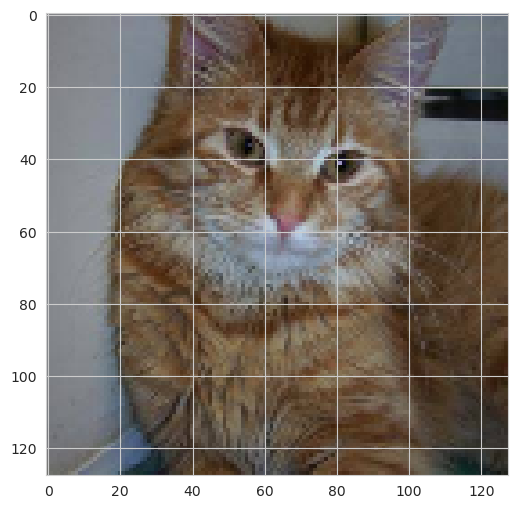

In [ ]:
plt.imshow(resized_img)
plt.show()

In [ ]:
resized_img = np.expand_dims(resized_img, axis=0)
resized_img.shape

(1, 128, 128, 3)

In [ ]:
model.predict(resized_img)

1/1 [==============================] - 0s 308ms/step


array([[3.4272016e-06]], dtype=float32)

In [ ]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

# Prediction-2

In [ ]:
random_image = random.sample(os.listdir(test_path), 1)
random_image

['11495.jpg']

In [ ]:
image_path = os.path.join(test_path, random_image[0])
image_path

'data/test/11495.jpg'

In [ ]:
my_image = image.load_img(image_path, target_size=image_shape)

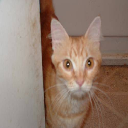

In [ ]:
my_image

In [ ]:
type(my_image)

PIL.Image.Image

In [ ]:
# my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [ ]:
my_image.max()

232.0

In [ ]:
my_image = my_image / 255

In [ ]:
my_image.shape

(128, 128, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)

In [ ]:
my_image.shape

(1, 128, 128, 3)

In [ ]:
model.predict(my_image)

1/1 [==============================] - 0s 21ms/step


array([[0.00145911]], dtype=float32)

In [ ]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    random_image = random.sample(os.listdir(test_path), 1)
    img_path = os.path.join(test_path, random_image[0])
    img = image.load_img(img_path, target_size=img_size)
    img = np.array(img)
    if img.max() > 1:
        img = img / 255

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())

    # Get the predicted class
    if len(pred[0]) > 1:  # check for multi-class
        pred_class = class_names[pred.argmax()]
        # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]
        # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 15ms/step
prediction_probability:  0.9611133


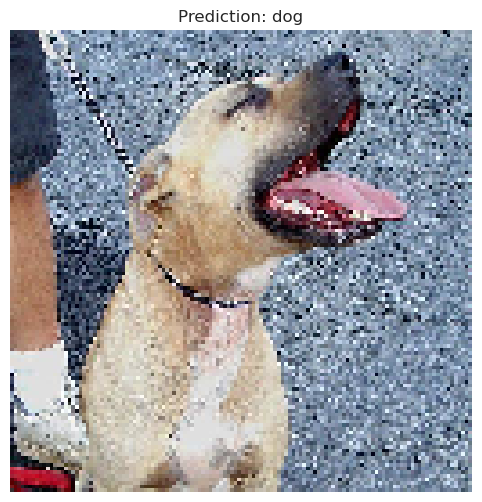

In [ ]:
pred_and_plot(model, image_shape[:2])

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>